### Actividad 8

**Obtenga  la  base  IRIS  del  paquete  datasetsde  la  librería  sklearn,  para  realizar un análisis de SVM.**

#### 1.Obtenga   un   resumen   estadístico   de   los   datos,   además   de   sus   distribuciones gráficas

In [45]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
iris = load_iris()
df_iris = pd.DataFrame(data = iris.data, columns=iris.feature_names)

In [9]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


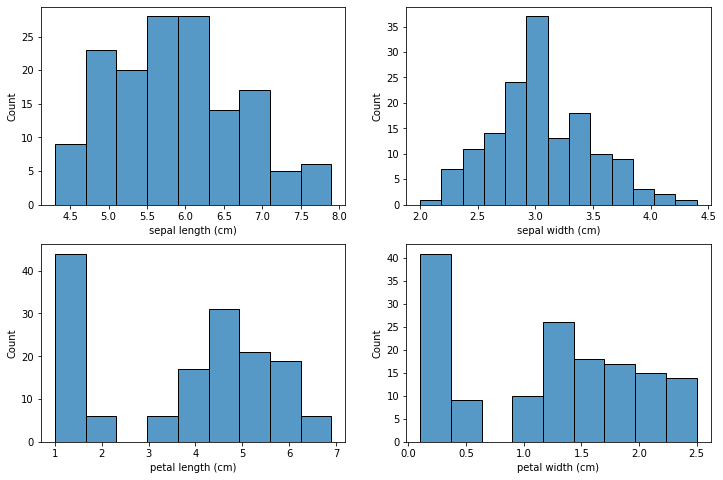

In [60]:
columnas_name = df_iris.columns

fig, axs = plt.subplots(
    ncols=2, nrows=2,
    figsize=(12, 8))

sns.histplot(
    x=columnas_name[0],
    data=df_iris,
    ax=axs[0,0],
)

sns.histplot(
    x=columnas_name[1],
    data=df_iris,
    ax=axs[0,1]
)

sns.histplot(
    x=columnas_name[2],
    data=df_iris,
    ax=axs[1,0]
)

sns.histplot(
    x=columnas_name[3],
    data=df_iris,
    ax=axs[1,1]
)

plt.show()

#### 2.Separe la base de train/test en 90/10

In [68]:
X = iris.data[:, :2]
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=0
)

#### 3. Ajuste un SVM con los siguientes kernel: "linear", "rbf", "poly"

In [69]:
# Create a SVM classifier with a linear kernel
svm_poly = SVC(kernel='poly')

svm_linear = SVC(kernel='linear')

svm_rbf = SVC(kernel='rbf')

# Train the SVM classifier
svm_poly.fit(X_train, y_train)
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

SVC()

#### 4. Entregue  el  gráfico  de  cada  uno  de  los  modelos  para  los  diferentes  kernel. 

Text(0.5, 1.0, 'SVM Classification')

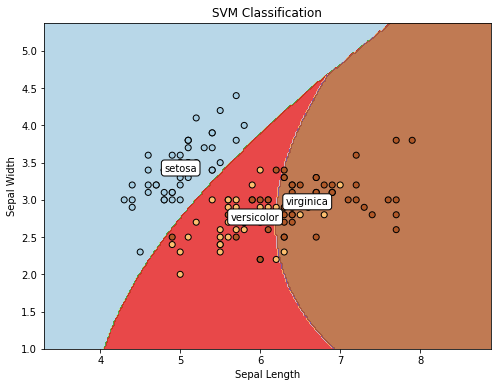

In [70]:
# Plot the decision boundary
# Create a meshgrid of points to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

# Make predictions on the meshgrid points
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
fig, ax = plt.subplots(figsize=(8, 6))

ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(
    X[:, 0], X[:, 1],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black',
)

# Add class labels
for i, label in enumerate(iris.target_names):
    ax.text(
        X[y == i, 0].mean(), X[y == i, 1].mean(),
        label,
        color='black',
        backgroundcolor='white',
        ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round')
    )

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('SVM Classification')

Text(0.5, 1.0, 'SVM Classification')

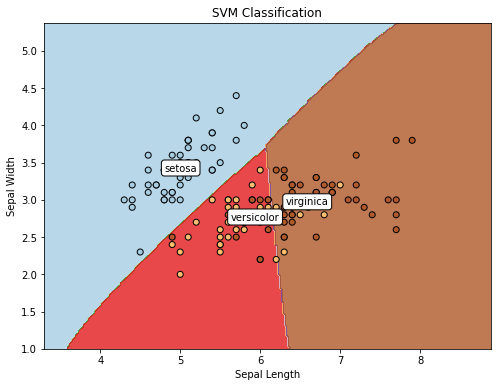

In [71]:
# Plot the decision boundary
# Create a meshgrid of points to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

# Make predictions on the meshgrid points
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
fig, ax = plt.subplots(figsize=(8, 6))

ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(
    X[:, 0], X[:, 1],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black',
)

# Add class labels
for i, label in enumerate(iris.target_names):
    ax.text(
        X[y == i, 0].mean(), X[y == i, 1].mean(),
        label,
        color='black',
        backgroundcolor='white',
        ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round')
    )

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('SVM Classification')

Text(0.5, 1.0, 'SVM Classification')

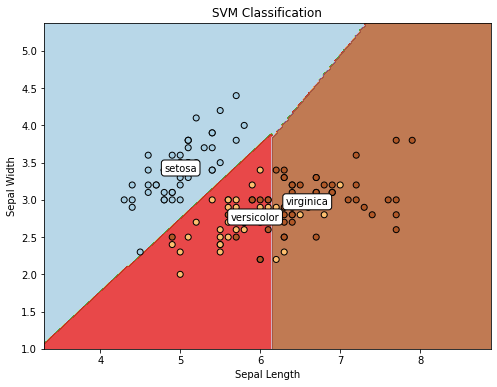

In [72]:
# Plot the decision boundary
# Create a meshgrid of points to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

# Make predictions on the meshgrid points
Z = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
fig, ax = plt.subplots(figsize=(8, 6))

ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(
    X[:, 0], X[:, 1],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black',
)

# Add class labels
for i, label in enumerate(iris.target_names):
    ax.text(
        X[y == i, 0].mean(), X[y == i, 1].mean(),
        label,
        color='black',
        backgroundcolor='white',
        ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round')
    )

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('SVM Classification')